In [1]:
import bs4
import requests
from selenium import webdriver
import time
import pyautogui as pag
import pandas as pd

import os
from bs4 import BeautifulSoup
import time
import datetime
from selenium.webdriver.common.by import By

In [47]:
df = pd.read_csv(os.path.join("..", "..", "Data", "2_Extracted", "Crude_Oil_5.csv"), index_col=0)

flag_K = ["K" in str(i) for i in df["Volume"]]
df["Volume"] = df["Volume"].apply(lambda x: float(str(x).replace("K", "")))
df["Volume"][flag_K] *= 1000


In [49]:
df.isna().sum()

O         94
H         94
L         94
C         94
Volume    94
dtype: int64

In [50]:
df_2 = pd.read_csv(os.path.join("..", "..", "Data", "2_Extracted", "Crude_Oil_5.csv"), index_col=0)

In [112]:
df.dropna().reset_index(drop=True).compare(df_2.reset_index(drop=True))

Volume        
        self   other
92    2002.0  2002.0
141   4028.0  4028.0
357   1023.0  1023.0
1197  4063.0  4063.0
1499  1023.0  1023.0
1522  1003.0  1003.0
1748  1013.0  1013.0
2022  2030.0  2030.0
2034  2031.0  2031.0
2354  2007.0  2007.0
2608  4060.0  4060.0
2625  1015.0  1015.0
2895  4078.0  4078.0
2922  1011.0  1011.0
3110  1005.0  1005.0
3326  1009.0  1009.0
3651  2022.0  2022.0
3690  2042.0  2042.0
3972  2006.0  2006.0
4059  1013.0  1013.0
4144  1013.0  1013.0
4171  1011.0  1011.0
4269  4070.0  4070.0
4306  1013.0  1013.0
4552  1013.0  1013.0
4558  1019.0  1019.0
4564  1001.0  1001.0
5002  2038.0  2038.0
5003  2019.0  2019.0
5046  4052.0  4052.0
5261  2014.0  2014.0
5463  1011.0  1011.0
5540  2030.0  2030.0
5841  4081.0  4081.0

In [105]:
df.dtypes

O         float64
H         float64
L         float64
C         float64
Volume    float64
dtype: object

In [55]:
pd.concat([df.dropna(),df_2]).drop_duplicates(keep=False)


,O,H,L,C,Volume
92,88.23,88.38,88.14,88.20,2002.0
141,86.81,86.97,86.69,86.75,4028.0
357,87.57,87.62,87.52,87.61,1023.0
1197,88.50,88.60,88.47,88.59,4063.0
1499,92.48,92.58,92.44,92.52,1023.0
...,...,...,...,...,...
5046,73.19,73.19,73.09,73.10,4052.0
5261,73.95,74.05,73.89,73.99,2014.0
5463,73.19,73.27,73.15,73.22,1011.0
5540,73.66,73.66,73.44,73.47,2030.0


In [127]:
df.iloc[92, -1]

2001.9999999999998

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


<Axes: >

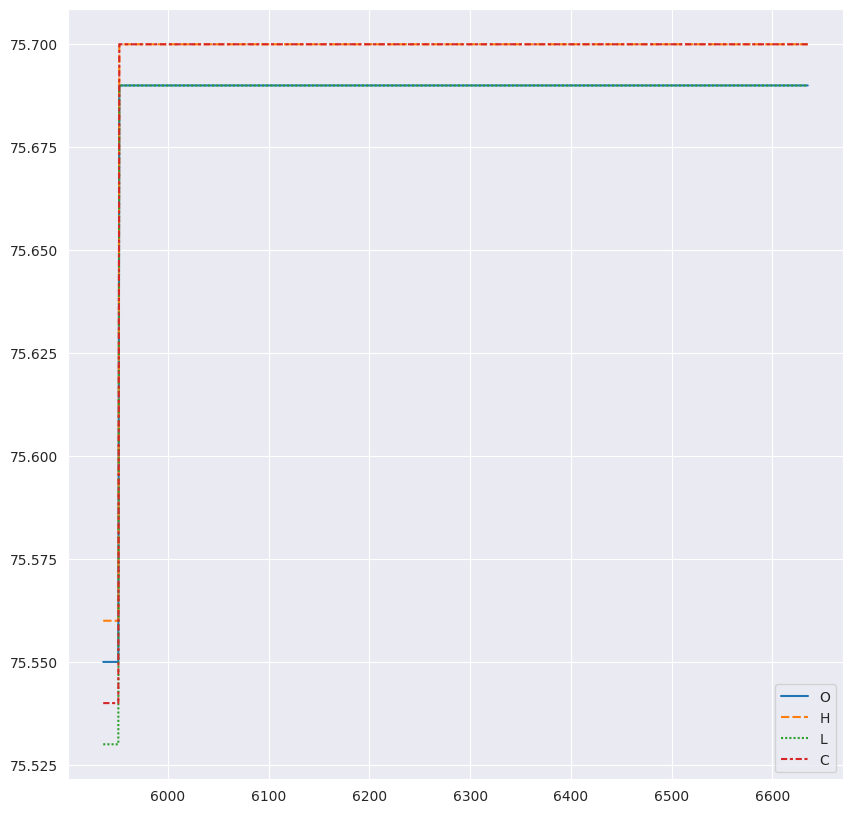

In [143]:
fig, ax = plt.subplots(figsize=(10,10))

# sns.lineplot(data=df_2, x=df_2.index, y=["O", "H"], ax=ax)
sns.lineplot(data=df_2.iloc[-3700:-3000, :-1], ax=ax)



In [144]:
len(df_2.index)

9636

In [175]:
df_2[
    (
            (df_2.diff() == [0, 0, 0, 0, 0]) &
            (df_2.diff(2) == [0, 0, 0, 0, 0]) &
            (df_2.diff(3) == [0, 0, 0, 0, 0]) &
            (df_2.diff(4) == [0, 0, 0, 0, 0]) &
            (df_2.diff(5) == [0, 0, 0, 0, 0]) &
            (df_2.diff(6) == [0, 0, 0, 0, 0]) &
            (df_2.diff(7) == [0, 0, 0, 0, 0]) &
            (df_2.diff(8) == [0, 0, 0, 0, 0]) &
            (df_2.diff(9) == [0, 0, 0, 0, 0]) &
            (df_2.diff(10) == [0, 0, 0, 0, 0])
    ).iloc[:,0]
].index[0]



5905

In [176]:
df_2.diff(10)

,O,H,L,C,Volume
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
9631,0.0,0.0,0.0,0.0,0.0
9632,0.0,0.0,0.0,0.0,0.0
9633,0.0,0.0,0.0,0.0,0.0
9634,0.0,0.0,0.0,0.0,0.0


In [153]:
df_debug

,O,H,L,C,Volume
5905,75.55,75.56,75.53,75.54,140.0
5906,75.55,75.56,75.53,75.54,140.0
5907,75.55,75.56,75.53,75.54,140.0
5908,75.55,75.56,75.53,75.54,140.0
5909,75.55,75.56,75.53,75.54,140.0
...,...,...,...,...,...
9631,75.69,75.70,75.69,75.70,922.0
9632,75.69,75.70,75.69,75.70,922.0
9633,75.69,75.70,75.69,75.70,922.0
9634,75.69,75.70,75.69,75.70,922.0


In [154]:
len(df_debug.index)

3721

In [168]:
np.diff(df_debug.index.to_numpy()) != 1

array([False, False, False, ..., False, False, False])

In [172]:
df_2.drop(df_debug.index.to_list())

,O,H,L,C,Volume
0,87.16,87.19,87.12,87.18,40.0
1,87.17,87.29,87.17,87.27,123.0
2,87.28,87.38,87.25,87.36,177.0
3,87.36,87.44,87.33,87.41,233.0
4,87.39,87.43,87.36,87.38,183.0
...,...,...,...,...,...
5957,75.69,75.70,75.69,75.70,922.0
5958,75.69,75.70,75.69,75.70,922.0
5959,75.69,75.70,75.69,75.70,922.0
5960,75.69,75.70,75.69,75.70,922.0


In [173]:
5962+3721

9683

In [177]:
df_3 = pd.read_csv(os.path.join("..", "..", "Data", "2_Extracted", "Crude_Oil_5.csv"), index_col=0)

In [179]:
df_3.tail()

,O,H,L,C,Volume
5892,75.55,75.59,75.55,75.58,298.0
5893,75.56,75.59,75.56,75.58,198.0
5894,75.56,75.58,75.56,75.57,129.0
5895,75.55,75.56,75.53,75.54,140.0
5896,75.55,75.56,75.53,75.54,140.0
